In [5]:
# Load packages
import requests 
import pandas as pd 
import time
import re

from bs4 import BeautifulSoup
from selenium import webdriver 
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.chrome.service import Service 
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [6]:
current_url = 'https://play.google.com/store/apps/details?id=com.ubercab.eats&hl=en&showAllReviews=true'

<!DOCTYPE html>
<html dir="ltr" lang="en"><head><base href="https://play.google.com/"/><meta content="origin" name="referrer"/><meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="yes" name="mobile-web-app-capable"/><meta content="yes" name="apple-mobile-web-app-capable"/><meta content="sBw2N8uateIzRr93vmFze5MF_35vMk5F1wG04L5JcJE" name="google-site-verification"/><meta content="PJKdyVFC5jlu_l8Wo_hirJkhs1cmitmn44fgpOc3zFc" name="google-site-verification"/><link href="/opensearch.xml" rel="search" title="Google Play" type="application/opensearchdescription+xml"/><link href="//www.gstatic.com/android/market_images/web/favicon_v3.ico" rel="shortcut icon"/><script data-id="_gd" nonce="jLv7DsBQgNv589B7SSAsDA">window.WIZ_global_data = {"AKEyDc":"%.@.[\"com.ncsoft.baseball.h3\",\"com.ncsoft.lineagem19\",\"com.ncsoft.lineage2m19\",\"com.ncsoft.tricksterm\",\"com.ncsoft.tricksterm19\",\"com.ncsoft.bns2\",\"com.ncsoft.bns219\",\"com.ncsoft.lineage2mjp\",\"com.ncsoft
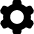
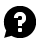
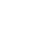
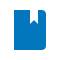
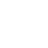
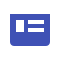
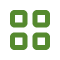
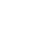
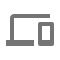
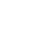
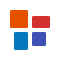
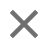
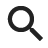
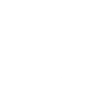
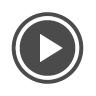

In [3]:
resp = requests.get(current_url)
content = BeautifulSoup(resp.content, 'lxml')
print(content)

In [11]:
def google_play_store(url):
    # Set up the Chrome driver service
    service = Service(executable_path="C:\\Program Files (x86)\\chromedriver.exe")
    # Instantiate the webdriver with the above service
    driver = webdriver.Chrome(service=service)
    # Go to the page you want to scrape
    driver.get(url)

    # Find and click see all reviews button using explicit wait
    see_all_button = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.XPATH, "//span[text()='See all reviews']"))
    )
    see_all_button.click()

    # Get the reviews container to scroll down later on
    reviews_container = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME, 'fysCi'))
    )

    review_list = []
    count = 1

    start_time = time.time()
    scroll_duration = 600  # 2 minutes
    while time.time() - start_time < scroll_duration:
        driver.execute_script("arguments[0].scrollBy(0, 1000);", reviews_container)

    while count <= 5000:
        # Get all the review elements
        content = WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.CLASS_NAME, 'RHo1pe'))
        )

        # Process a batch of reviews
        for post in content:
            try:
                review = post.find_element(By.CLASS_NAME, 'h3YV2d').text
                date = post.find_element(By.CLASS_NAME, 'bp9Aid').text
                stars_el = post.find_element(By.CLASS_NAME, 'iXRFPc')
                stars_label = stars_el.get_attribute('aria-label')
                name = post.find_element(By.CLASS_NAME, 'X5PpBb').text

                data = {
                    "review": review,
                    "date": date,
                    "stars": stars_label,
                    "name": name,
                    "source": "Google Play Store",
                }
                review_list.append(data)

                count += 1
                if count > 5000:
                    break

            except Exception as e:
                print(e)
                continue

    driver.quit()

    return pd.DataFrame(review_list)


In [14]:
df_reviews = google_play_store(current_url)  
df_reviews

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=120.0.6099.225)
Stacktrace:
	GetHandleVerifier [0x00007FF7920C2142+3514994]
	(No symbol) [0x00007FF791CE0CE2]
	(No symbol) [0x00007FF791B876AA]
	(No symbol) [0x00007FF791B60AFD]
	(No symbol) [0x00007FF791BFCB1B]
	(No symbol) [0x00007FF791C1218F]
	(No symbol) [0x00007FF791BF5D93]
	(No symbol) [0x00007FF791BC4BDC]
	(No symbol) [0x00007FF791BC5C64]
	GetHandleVerifier [0x00007FF7920EE16B+3695259]
	GetHandleVerifier [0x00007FF792146737+4057191]
	GetHandleVerifier [0x00007FF79213E4E3+4023827]
	GetHandleVerifier [0x00007FF791E104F9+689705]
	(No symbol) [0x00007FF791CEC048]
	(No symbol) [0x00007FF791CE8044]
	(No symbol) [0x00007FF791CE81C9]
	(No symbol) [0x00007FF791CD88C4]
	BaseThreadInitThunk [0x00007FFA80E9257D+29]
	RtlUserThreadStart [0x00007FFA81D2AA58+40]


In [9]:
df_reviews.to_csv("Google_Playstore.csv", index= False)

In [13]:
unique_counts = df_reviews.nunique()
print(unique_counts)

review    2880
date       166
stars        5
name      2861
source       1
dtype: int64
